# Functional Data Analysis with Monovariate Prediction
This notebook demonstrates the process of conducting a functional data analysis with a focus on monovariate prediction. It outlines the goal of the notebook, the dataset being used, and the main steps that will be taken.

## Setting Up the Environment
The following cells set up the environment by loading necessary libraries and defining the path to the simulation file.

In [42]:
# @__DIR__ is the directory of the current file
# We need to go up to the parent directory to find the project root
project_root = dirname(dirname(@__DIR__))


include(joinpath(project_root, "setup", "init_env.jl"))
set_R_lib_path(project_root)
using Plots


  Activating project at `c:\Users\User\Documents\repos\TESI\tesi_data\progetto_s_on_f.md\b_spline\functional-data-regression-mip`


## Load Data and Run R Simulation
Here we load the data required for the simulation and run the R simulation script to prepare the data for analysis.

**NOTICE** -> The seed should be the same for both the training and the test datasets, otherwise the data distribution will be different. 
This is very important specifically in the "Paper simulation" where the predictors shape depends on the coefficients a1,...f3 extracted from Uniform and Normal distributions.  

In [43]:
include(joinpath(project_root, "src", "Julia", "utils", "simulation.jl"))


simulation_name = "3_predictors"
simulation_settings_file = "default"

measurements = 500
basis_functions = 6
params_train = (
    observations = 300,
    measurements = measurements,
    basis_functions = basis_functions,
    noise_snr = [100,1000],
    seed = 1
)

params_test = (
    observations = 300,
    measurements = measurements,
    basis_functions = basis_functions,
    noise_snr = [100,1000],
    seed = 300
)



(observations = 300, measurements = 500, basis_functions = 6, noise_snr = [100, 1000], seed = 300)

Load Data

In [44]:

# Note: Use ... to unpack NamedTuple into keyword arguments
output = load_simulation_data(simulation_name, simulation_settings_file, project_root; params_train...)

output_test = load_simulation_data(simulation_name, simulation_settings_file, project_root; params_test...)


# Grab the outputs from the R script

predictors = Int(output[:predictors])
true_predictors = output[:true_predictors]
intercept = output[:intercept]
observations = Int(output[:observations])

# betas and basis
beta_matrix  = output[:B]
basis_objs   = output[:basis_objs]
basis_values = output[:basis_values]
time_domains = output[:time_domains]

# matrixes 
U = output[:U]
X = output[:X]
Y = output[:Y]
Z = output[:Z]
J = output[:J]
W = output[:W]


X_test = output_test[:X]
Y_test = output_test[:Y]
Z_test = output_test[:Z]
J_test = output_test[:J]
W_test = output_test[:W]


[1] "predictors: 3"
[1] "observations: 300"
[1] "measurements: 500"
[1] "basis_functions: 6"
[1] "intercept: 0"
[1]  100 1000
[1] "predictors: 3"
[1] "observations: 300"
[1] "measurements: 500"
[1] "basis_functions: 6"
[1] "intercept: 0"
[1]  100 1000


300×3×6 Array{Float64, 3}:
[:, :, 1] =
 -1.97867    -2.47143   4.31716
  0.201073   -2.77853   5.07652
  0.87941    -0.12669   4.74312
 -0.526825   -1.57194   4.24588
  0.427942   -0.486993  4.6596
 -0.482254   -1.69169   3.91658
 -1.63635    -1.61685   5.3613
  0.943196   -2.21033   5.19912
 -0.161361   -1.89934   4.86623
 -0.600572   -1.60163   4.41998
  0.25942    -1.66137   3.7991
 -0.685077   -3.30687   3.46815
  0.579083   -1.80741   3.35059
  ⋮                     
  0.047998   -0.858088  4.01564
  0.146082   -1.82528   3.90723
 -0.113092   -1.64992   3.84725
  0.159676   -1.55402   5.45838
 -0.404966   -0.60404   4.04302
  0.0508469  -0.706491  5.07177
  1.2451     -1.18897   4.78791
 -0.242617   -1.96338   3.63436
 -0.217322   -2.86708   3.56793
  1.21879    -0.376658  3.18986
  0.583447   -0.615595  2.88877
 -0.161398   -0.540882  3.02803

[:, :, 2] =
 -2.77942    5.89139   1.90465
 -0.351616   2.39096   1.80612
 -0.208948   5.74163  -1.06956
 -1.42352    5.22978   0.917301
 

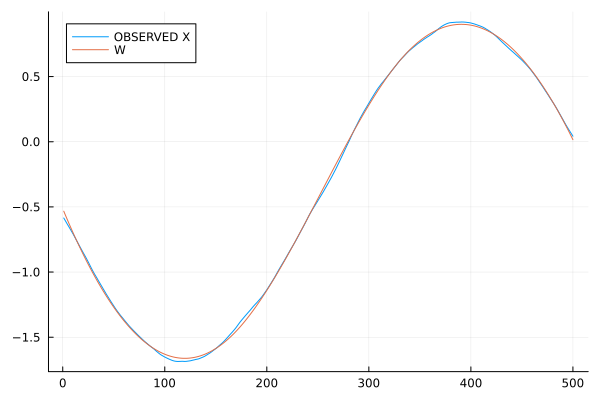

In [45]:
#  plot(U[1,1,:], label="TRUE U", legend=:topleft)
plot(X[1,1,:], label="OBSERVED X", legend=:topleft)
plot!(basis_values[1,:,:] * W[1, 1, :], label="W", legend=:topleft)


## Model Execution
Run the predictive model using the prepared data.

In [46]:
model_name = "l0"
model_file_path = joinpath(project_root, "src", "Julia","models", model_name *".jl")

include(model_file_path)

beta_matrix_max_values = maximum(beta_matrix, dims = 2)
beta_matrix_min_values = minimum(beta_matrix, dims = 2)

BigM = ones(predictors) .*     30000000
BigM_ =  ones(predictors) .*  - 30000000

to_predict = sum(true_predictors)
beta_star, alpha_star, groups = mip_functional_regression(Y, Z, BigM,BigM_; intercept = output[:intercept] != 0, group_limit= to_predict)




Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-22
Set parameter TimeLimit to value 1800
Set parameter TimeLimit to value 1800
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 37 rows, 21 columns and 75 nonzeros
Model fingerprint: 0x30ae636e
Model has 171 quadratic objective terms
Variable types: 18 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+07]
  Objective range  [4e+02, 7e+05]
  QObjective range [1e-01, 2e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 3e+00]
Found heuristic solution: objective 2056179.6011
Presolve removed 37 rows and 3 columns
Presolve time: 0.00s
Presolved: 0 rows, 18 columns, 0 nonzeros
Presolved model has 171 quadratic objective terms
Variable types: 18 continuous, 0 integ

([0.6653710752725601 1.3982426896691322 … 1.9905936643481255 -0.559715248644352; 0.012287694960832596 0.4686734564602375 … -0.6860592253506184 -0.8200589120388031; -1.0523570030927658 -0.5200957395136356 … 2.536541275680065 2.9834613278508186], 0, [1.0, 1.0, 1.0])

## Model Results
Display the results of the model, including the estimated beta coefficients.

In [47]:
beta_matrix # true beta

3×6 Matrix{Float64}:
  0.999996    1.00005   0.958977  0.781779   0.600778   0.500004
  0.0023011   0.464699  1.35922   0.48815   -0.659525  -0.857705
 -1.0        -0.555556  0.333333  1.66667    2.55556    3.0

In [48]:
beta_star  # estimated beta

3×6 Matrix{Float64}:
  0.665371    1.39824   1.25784   -0.220726   1.99059   -0.559715
  0.0122877   0.468673  1.32104    0.526766  -0.686059  -0.820059
 -1.05236    -0.520096  0.306472   1.69901    2.53654    2.98346

In [49]:
groups

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [50]:
alpha_star

0

## Final Output
Plot the combined predicted curve and save the output for further analysis.

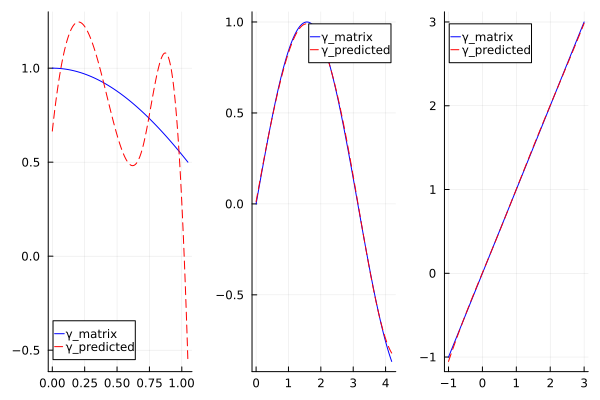

"c:\\Users\\User\\Documents\\repos\\TESI\\tesi_data\\progetto_s_on_f.md\\b_spline\\functional-data-regression-mip\\outputs\\plots\\3_predictors\\combined.png"

In [51]:
project_root = dirname( dirname(@__DIR__))
plot_file_path = joinpath(project_root, "src", "Julia","utils", "plot.jl")

include(plot_file_path)

output_folder= joinpath(project_root, "outputs", "plots", simulation_name)

beta_point_values = output[:beta_point_values]
# plot_combined_predicted_curve(beta_point_values, beta_star,basis_values, time_domains,output_folder, true; upper_bound = UB_M, lower_bound = LB_M)
plot_combined_predicted_curve(beta_point_values, beta_star,basis_values, time_domains,output_folder, true)



In [63]:
function ols_solution(Y, Z)
    # Y: Vector of observed response variables
    # Z: Matrix of predictor variables
    
    # Reshape Z to be a matrix with dimensions (observations x predictors * basis functions)
    Z_reshaped = reshape(Z, :, size(Z, 2) * size(Z, 3))
    
    # Add a column of ones to Z for the intercept term
    Z_with_intercept = hcat(ones(size(Z_reshaped, 1)), Z_reshaped)
    
    # Calculate the OLS coefficients
    beta_hat = (Z_with_intercept' * Z_with_intercept) \ (Z_with_intercept' * Y)
    
    # Reshape beta_hat to be a matrix with dimensions (predictors x basis functions)
    beta_hat_matrix = reshape(beta_hat[2:end], size(Z, 2), size(Z, 3))
    
    return beta_hat_matrix
end



# Calculate OLS coefficients
beta_hat = ols_solution(Y, Z)



3×6 Matrix{Float64}:
  0.666332    1.39561   1.26083   -0.222765   1.99051   -0.558185
  0.0131055   0.467475  1.32247    0.524822  -0.683778  -0.822796
 -1.05283    -0.519989  0.306684   1.69843    2.53758    2.98132

In [65]:
beta_hat

3×6 Matrix{Float64}:
  0.666332    1.39561   1.26083   -0.222765   1.99051   -0.558185
  0.0131055   0.467475  1.32247    0.524822  -0.683778  -0.822796
 -1.05283    -0.519989  0.306684   1.69843    2.53758    2.98132

In [64]:
beta_star

3×6 Matrix{Float64}:
  0.665371    1.39824   1.25784   -0.220726   1.99059   -0.559715
  0.0122877   0.468673  1.32104    0.526766  -0.686059  -0.820059
 -1.05236    -0.520096  0.306472   1.69901    2.53654    2.98346

In [11]:

using Statistics 
using LinearAlgebra

include(joinpath(project_root, "src", "Julia", "utils", "data_analysis.jl"))

performance_metrics = compute_metrics(Y_test, Z_test, beta_matrix, beta_matrix, alpha_star, groups, predictors)


Dict{String, Float64} with 11 entries:
  "Functional_Correlation" => 0.999507
  "CDF_Distance"           => 0.00278492
  "R_squared"              => 0.998496
  "RMSE_Predictions"       => 0.0932847
  "RMSE_Coefficients"      => 0.0
  "Area_Between_Curves"    => 22.6474
  "ISE_Coefficients"       => 0.0
  "MSE_Predictions"        => 0.00870204
  "Adjusted_R_squared"     => 0.998481
  "MSE_Coefficients"       => 0.0
  "MAE_Predictions"        => 0.0754915

In [12]:

using Statistics 
using LinearAlgebra

include(joinpath(project_root, "src", "Julia", "utils", "data_analysis.jl"))

performance_metrics = compute_metrics(Y_test, Z_test, beta_matrix, beta_star, alpha_star, groups, predictors)


Dict{String, Float64} with 11 entries:
  "Functional_Correlation" => 0.99946
  "CDF_Distance"           => 0.00410608
  "R_squared"              => 0.998913
  "RMSE_Predictions"       => 0.0793037
  "RMSE_Coefficients"      => 0.496154
  "Area_Between_Curves"    => 19.0016
  "ISE_Coefficients"       => 4.43104
  "MSE_Predictions"        => 0.00628908
  "Adjusted_R_squared"     => 0.998902
  "MSE_Coefficients"       => 0.246169
  "MAE_Predictions"        => 0.0633385